In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':18})

In [10]:
simulation_data = np.genfromtxt('../../../csv/BA_results_10_000.csv', delimiter=',')

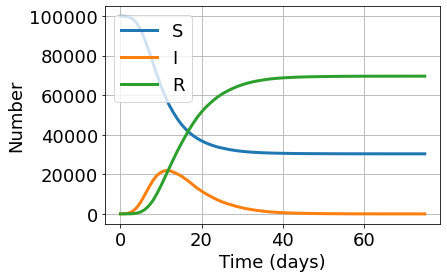

In [11]:
plt.Figure(figsize=(10,7))
plt.plot(simulation_data,label =['S', 'I', 'R'], linewidth = 3)
# plt.xlim([0,100])
plt.ylabel('Number')
plt.xlabel('Time (days)')
plt.legend()
plt.grid(0.3)
plt.savefig('../../../figures/random_graph_model_figs/SIR_random_graph_0.1_0.1.png', bbox_inches = 'tight')
plt.show()